In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np

# Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints, i.e., *equality* and *inequality* constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & Gx \leq h \\ & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

i.e.,

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & \hat{G}x \leq \hat{h}
    \end{aligned}
\end{equation}
$$

where $\hat{G} =
\begin{bmatrix}
 G \\
-I \\
 I 
\end{bmatrix}$ and $\hat{h} =
\begin{bmatrix}
h & -lb & ub
\end{bmatrix}$.

In [3]:
from optiml.opti import Quadratic
from optiml.opti.constrained import *
from optiml.opti.utils import generate_box_constrained_quadratic, plot_surface_trajectory_optimization

In [4]:
Q, q, ub = generate_box_constrained_quadratic(ndim=2, seed=6)
quad = Quadratic(Q, q)

### Lagrangian Dual

In [5]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-5.2516e+02	-5.2516e+02			pcost: -5.2516e+02	dgap:  0.0000e+00
100000	100000	-1.6619e+03	-1.6619e+03	-3.1645e+00	pcost: -4.0303e+03	dgap:  5.8765e-01
200000	200000	-8.7017e+02	-8.7017e+02	-5.2361e-01	pcost: -3.2487e+03	dgap:  7.3215e-01
300000	300000	-4.9117e+02	-4.9117e+02	-5.6445e-01	pcost: -2.6033e+03	dgap:  8.1133e-01
400000	400000	-2.8618e+02	-2.8618e+02	-5.8266e-01	pcost: -2.0759e+03	dgap:  8.6214e-01
500000	500000	-1.6946e+02	-1.6946e+02	-5.9213e-01	pcost: -1.6481e+03	dgap:  8.9718e-01
600000	600000	-1.0123e+02	-1.0123e+02	-5.9740e-01	pcost: -1.3036e+03	dgap:  9.2235e-01
700000	700000	-6.0784e+01	-6.0784e+01	-6.0044e-01	pcost: -1.0278e+03	dgap:  9.4086e-01
800000	800000	-3.6606e+01	-3.6606e+01	-6.0223e-01	pcost: -8.0818e+02	dgap:  9.5471e-01
900000	900000	-2.2084e+01	-2.2084e+01	-6.0329e-01	pcost: -6.3408e+02	dgap:  9.6517e-01
1000000	1000000	-1.3337e+01	-1.3337e+01	-6.0393e-01	pcost: -4.9659e+02	dgap:  9.7314e-01
1100000	1100000	-8.0600e+

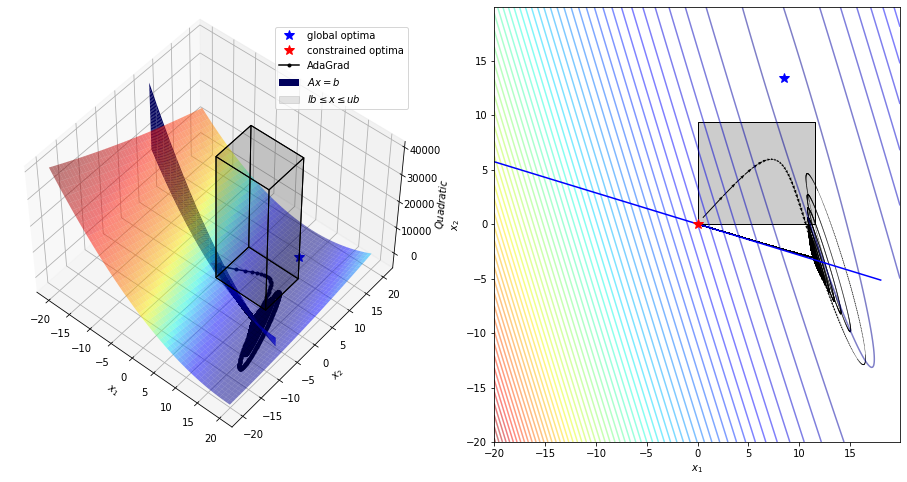

In [6]:
dual = LagrangianQuadratic(primal=quad, A=[2, 7], b=np.zeros(1), lb=np.zeros_like(q), ub=ub)
opt = AdaGrad(f=dual, step_size=2, epochs=2000000, verbose=100000).minimize()
print(opt.x[:dual.primal.ndim])
print(opt.x[dual.primal.ndim:])  # Lagrange multipliers
plot_surface_trajectory_optimization(dual, opt, primal=True, x_min=-20, x_max=20, y_min=-20, y_max=20)

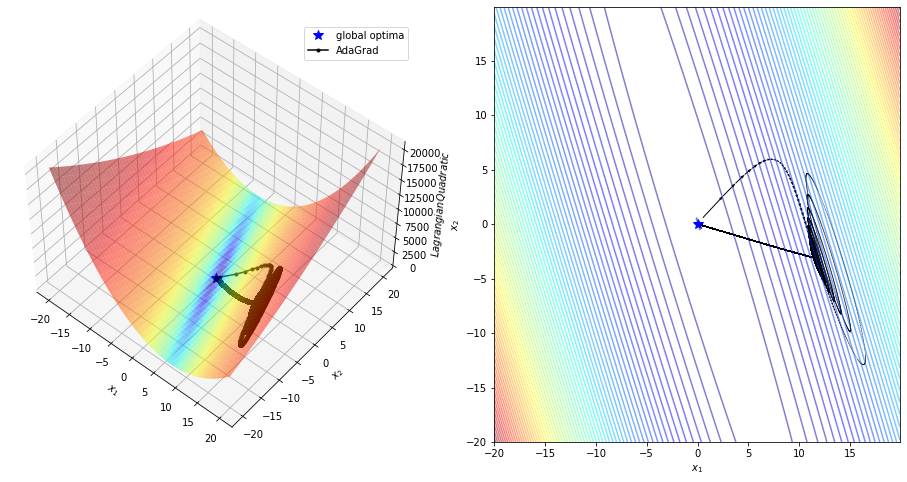

In [7]:
plot_surface_trajectory_optimization(dual, opt, primal=False, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Augmented Lagrangian Dual

In [8]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-6.7875e+02	-6.7875e+02			pcost: -7.1256e+02	dgap:  4.7439e-02
 500	 500	-9.4448e+02	-9.4448e+02	-1.3915e+00	pcost: -3.5933e+03	dgap:  7.3716e-01
1000	1000	-1.5595e+02	-1.5595e+02	-1.6512e-01	pcost: -1.7447e+03	dgap:  9.1062e-01
1500	1500	-2.5706e+01	-2.5706e+01	-1.6483e-01	pcost: -7.5513e+02	dgap:  9.6596e-01
2000	2000	-4.2360e+00	-4.2360e+00	-1.6479e-01	pcost: -3.1423e+02	dgap:  9.8652e-01
2500	2500	-6.9800e-01	-6.9800e-01	-1.6478e-01	pcost: -1.2882e+02	dgap:  9.9458e-01
3000	3000	-1.1502e-01	-1.1502e-01	-1.1502e-01	pcost: -5.2499e+01	dgap:  9.9781e-01
3500	3500	-1.8952e-02	-1.8952e-02	-1.8952e-02	pcost: -2.1345e+01	dgap:  9.9911e-01
4000	4000	-3.1229e-03	-3.1229e-03	-3.1229e-03	pcost: -8.6703e+00	dgap:  9.9964e-01
4500	4500	-5.1459e-04	-5.1459e-04	-5.1459e-04	pcost: -3.5205e+00	dgap:  9.9985e-01
5000	5000	-8.4794e-05	-8.4793e-05	-8.4793e-05	pcost: -1.4292e+00	dgap:  9.9994e-01
5500	5500	-1.3972e-05	-1.3971e-05	-1.3971e-05	pcost: -5.8019e-01	dg

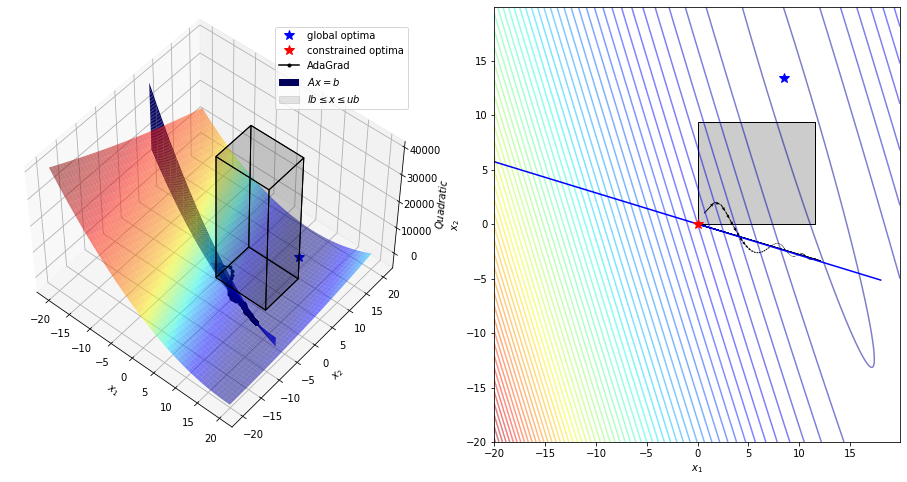

In [9]:
dual = AugmentedLagrangianQuadratic(primal=quad, A=[2, 7], b=np.zeros(1), lb=np.zeros_like(q), ub=ub, rho=1)
opt = AdaGrad(f=dual, step_size=1, epochs=100000, verbose=500).minimize()
print(opt.x)
print(opt.f.dual_x)  # Lagrange multipliers
plot_surface_trajectory_optimization(dual, opt, primal=True, x_min=-20, x_max=20, y_min=-20, y_max=20)

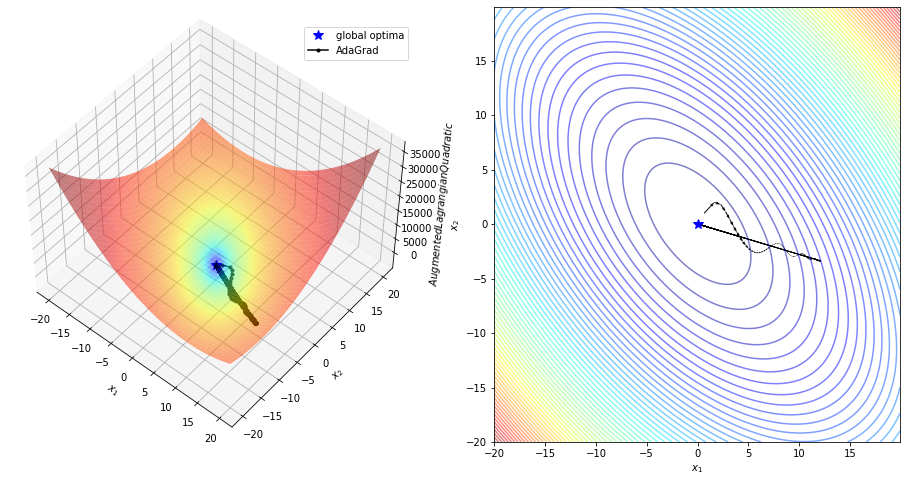

In [10]:
plot_surface_trajectory_optimization(dual, opt, primal=False, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Box-Constrained Quadratic Methods

From the $\mathcal{L}_1$-SVM *Wolfe dual* formulation we observe that the equality constraints $Ax = 0$ are used to control the bias term $b$ since they are intoduced following the Lagrangian derivative wrt $b$ (see the *Computational Mathematics Report*). The simplest approach to learn the bias term $b$ is that of adding it at the end of the weights vector. So, we will need to solve a box-constrained quadratic problem:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & 0 \leq x \leq ub
    \end{aligned}
\end{equation}
$$

### Projected Gradient

iter	 cost		 gnorm
   0	-3.9978e+03	 3.4722e+02
   1	-4.9192e+03	 2.4451e+00
   2	-4.9253e+03	 9.3108e-01
   3	-4.9253e+03	 0.0000e+00

[9.83987825 9.32791922]


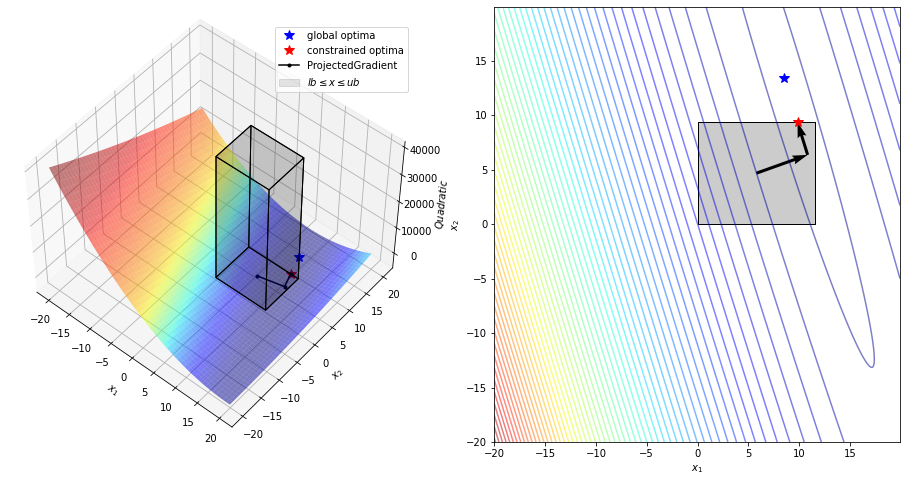

In [5]:
opt = ProjectedGradient(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Frank-Wolfe or Conditional Gradient

iter	 cost		 lb		 gap
   0	-3.9978e+03	-6.4161e+03	 6.0490e-01
 100	-4.9243e+03	-4.9256e+03	 2.5550e-04
 200	-4.9246e+03	-4.9255e+03	 1.7426e-04
 300	-4.9248e+03	-4.9254e+03	 1.3301e-04
 400	-4.9249e+03	-4.9254e+03	 1.0787e-04
 500	-4.9249e+03	-4.9254e+03	 9.0872e-05
 600	-4.9250e+03	-4.9254e+03	 7.8586e-05
 700	-4.9250e+03	-4.9254e+03	 6.9275e-05
 800	-4.9250e+03	-4.9253e+03	 6.1968e-05
 900	-4.9251e+03	-4.9253e+03	 5.6076e-05
1000	-4.9251e+03	-4.9253e+03	 5.1221e-05
1100	-4.9251e+03	-4.9253e+03	 4.7150e-05
1200	-4.9251e+03	-4.9253e+03	 4.3685e-05
1300	-4.9251e+03	-4.9253e+03	 4.0701e-05
1400	-4.9251e+03	-4.9253e+03	 3.8102e-05
1500	-4.9251e+03	-4.9253e+03	 3.5819e-05
1600	-4.9252e+03	-4.9253e+03	 3.3796e-05
1700	-4.9252e+03	-4.9253e+03	 3.1992e-05
1800	-4.9252e+03	-4.9253e+03	 3.0372e-05
1900	-4.9252e+03	-4.9253e+03	 2.8910e-05
2000	-4.9252e+03	-4.9253e+03	 2.7583e-05

[9.86442097 9.25158605]


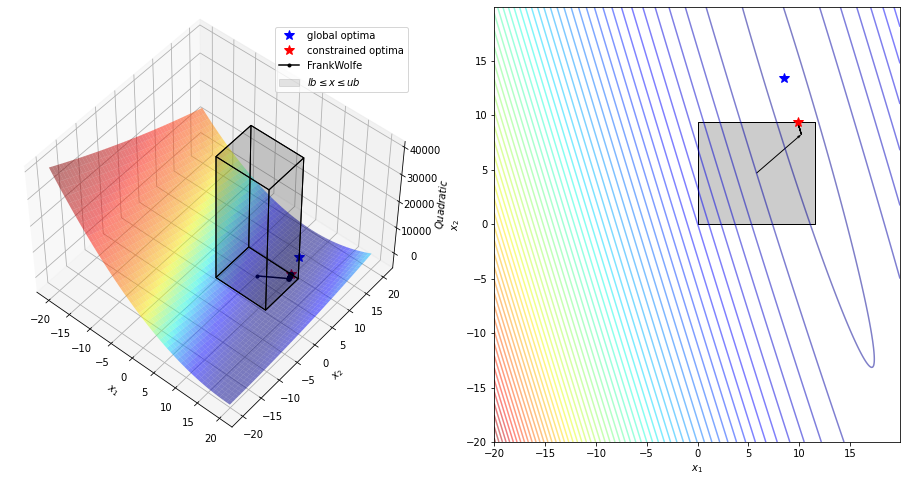

In [8]:
opt = FrankWolfe(quad=quad, ub=ub, max_iter=2000, verbose=100).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Active Set

iter	 cost		|B|
   0	-3.9978e+03	0		I/O: I 0+1
   1	-4.7254e+03	1	

[9.83987825 9.32791922]


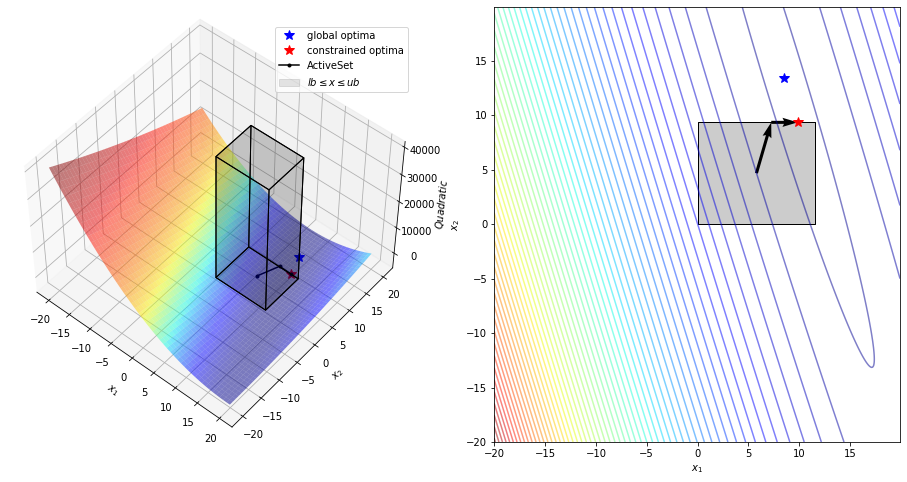

In [5]:
opt = ActiveSet(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Interior Point

iter	 cost		 p		 gap
   0	-3.9978e+03	-6.4161e+03	 6.0490e-01
   1	-4.9006e+03	-6.0925e+03	 2.4321e-01
   2	-4.7614e+03	-5.3892e+03	 1.3185e-01
   3	-4.9227e+03	-5.0405e+03	 2.3930e-02
   4	-4.9223e+03	-4.9428e+03	 4.1679e-03
   5	-4.9237e+03	-4.9280e+03	 8.8192e-04
   6	-4.9250e+03	-4.9259e+03	 1.8861e-04
   7	-4.9253e+03	-4.9254e+03	 2.8402e-05
   8	-4.9253e+03	-4.9253e+03	 4.0722e-06
   9	-4.9253e+03	-4.9253e+03	 5.8510e-07
  10	-4.9253e+03	-4.9253e+03	 8.3179e-08
  11	-4.9253e+03	-4.9253e+03	 1.1943e-08
  12	-4.9253e+03	-4.9253e+03	 1.6975e-09
  13	-4.9253e+03	-4.9253e+03	 2.4372e-10
  14	-4.9253e+03	-4.9253e+03	 3.4642e-11

[9.83987825 9.32791919]


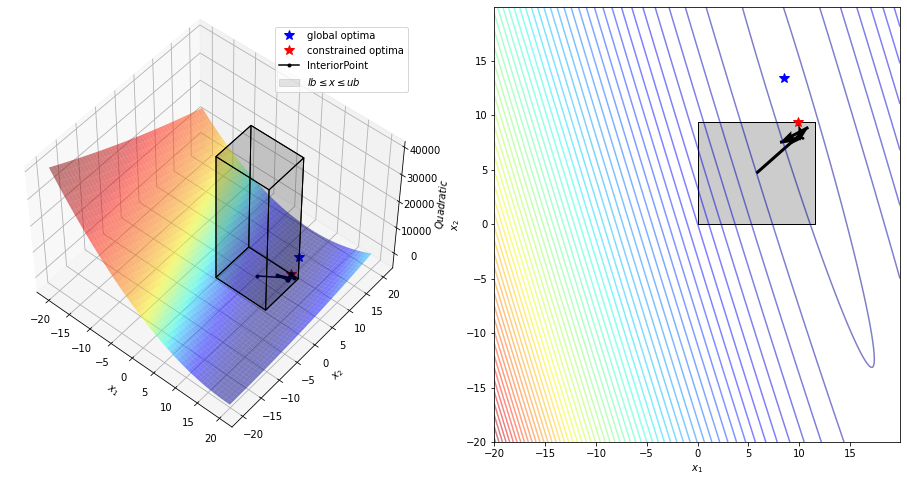

In [10]:
opt = InteriorPoint(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Lagrangian Dual

In [11]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-7.0107e+02	 8.5766e-01			pcost: -7.0107e+02	dgap:  0.0000e+00
1000	1000	-4.9254e+03	-1.6638e-05	-1.9400e-05	pcost: -4.9254e+03	dgap:  1.5484e-06
2000	2000	-4.9254e+03	-1.3358e-05	-6.5794e-02	pcost: -4.9254e+03	dgap:  9.0591e-06
3000	3000	-4.9253e+03	-8.1777e-06	-4.0277e-02	pcost: -4.9254e+03	dgap:  1.2777e-05
4000	4000	-4.9253e+03	-4.5847e-06	-2.2581e-02	pcost: -4.9254e+03	dgap:  1.3161e-05
5000	5000	-4.9253e+03	-2.5225e-06	-1.2424e-02	pcost: -4.9254e+03	dgap:  1.1777e-05
6000	6000	-4.9253e+03	-1.4456e-06	-7.1200e-03	pcost: -4.9253e+03	dgap:  9.7352e-06
7000	7000	-4.9253e+03	-9.2098e-07	-4.5361e-03	pcost: -4.9253e+03	dgap:  7.6465e-06
8000	8000	-4.9253e+03	-6.8190e-07	-3.3585e-03	pcost: -4.9253e+03	dgap:  5.7925e-06
9000	9000	-4.9253e+03	-5.8108e-07	-2.8620e-03	pcost: -4.9253e+03	dgap:  4.2684e-06
10000	10000	-4.9253e+03	-5.4293e-07	-2.6741e-03	pcost: -4.9253e+03	dgap:  3.0753e-06
11000	11000	-4.9253e+03	-5.3106e-07	-2.6156e-03	pcost: -4.9253e+0

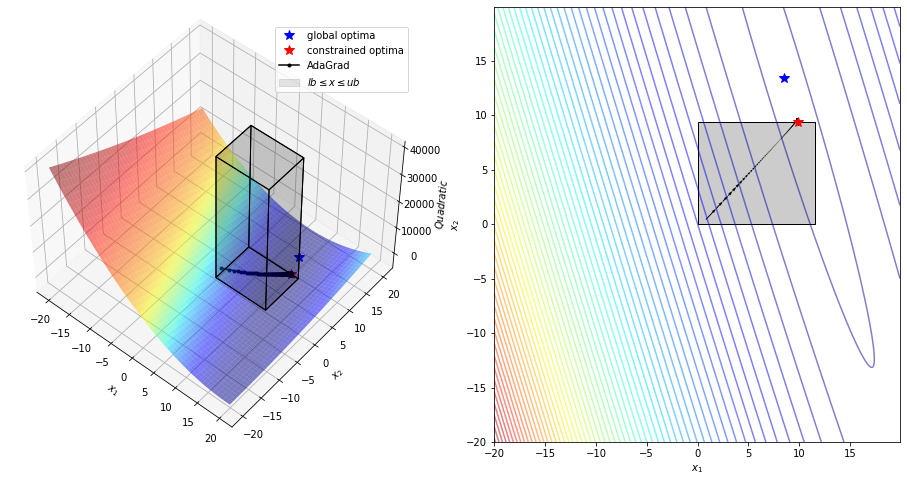

In [12]:
dual = LagrangianQuadratic(primal=quad, lb=np.zeros_like(q), ub=ub)
opt = AdaGrad(f=dual, step_size=1, epochs=50000, verbose=1000).minimize()
print(opt.x[:dual.primal.ndim])
print(opt.x[dual.primal.ndim:])  # Lagrange multipliers >= 0
plot_surface_trajectory_optimization(dual, opt, primal=True, x_min=-20, x_max=20, y_min=-20, y_max=20)

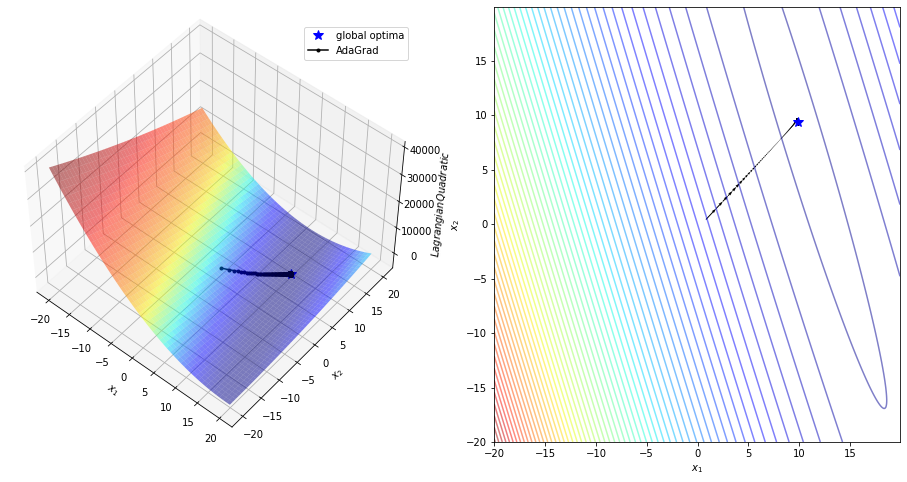

In [13]:
plot_surface_trajectory_optimization(dual, opt, primal=False, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Augmented Lagrangian Dual

In [14]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-8.3545e+02	 8.3038e-01			pcost: -8.3545e+02	dgap:  0.0000e+00
 200	 200	-4.9250e+03	 6.3983e-05	 7.7053e-05	pcost: -4.9250e+03	dgap:  0.0000e+00
 400	 400	-4.9253e+03	-2.3721e-06	-1.1683e-02	pcost: -4.9253e+03	dgap:  5.7590e-06
 600	 600	-4.9253e+03	-1.0149e-06	-4.9989e-03	pcost: -4.9253e+03	dgap:  5.9546e-06
 800	 800	-4.9253e+03	-3.0250e-07	-1.4899e-03	pcost: -4.9253e+03	dgap:  2.0185e-06
1000	1000	-4.9253e+03	-5.3738e-07	-2.6468e-03	pcost: -4.9253e+03	dgap:  8.2675e-08
1200	1200	-4.9253e+03	-5.4901e-07	-2.7040e-03	pcost: -4.9253e+03	dgap:  6.2968e-07
1400	1400	-4.9253e+03	-5.3124e-07	-2.6165e-03	pcost: -4.9253e+03	dgap:  3.6139e-07
1600	1600	-4.9253e+03	-5.3364e-07	-2.6283e-03	pcost: -4.9253e+03	dgap:  4.4460e-08
1800	1800	-4.9253e+03	-5.3448e-07	-2.6325e-03	pcost: -4.9253e+03	dgap:  6.8379e-08
2000	2000	-4.9253e+03	-5.3418e-07	-2.6310e-03	pcost: -4.9253e+03	dgap:  5.2668e-08
2200	2200	-4.9253e+03	-5.3417e-07	-2.6310e-03	pcost: -4.9253e+03	dg

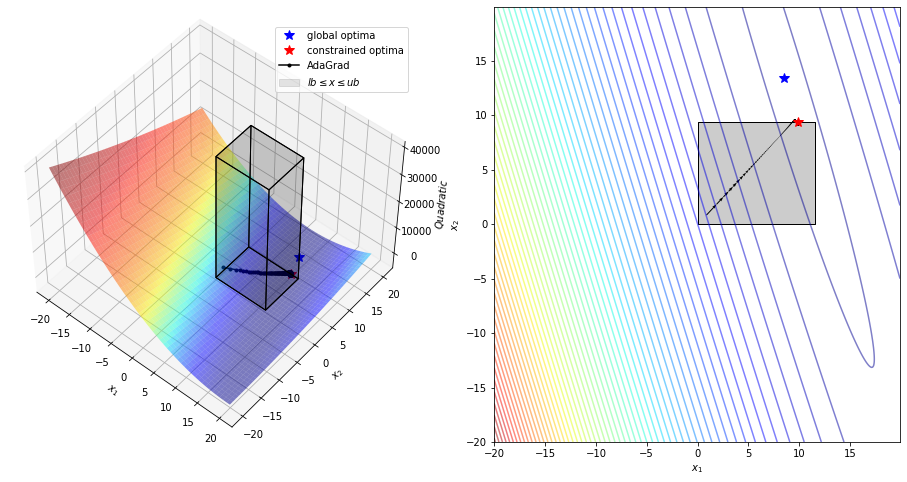

In [15]:
dual = AugmentedLagrangianQuadratic(primal=quad, lb=np.zeros_like(q), ub=ub, rho=1)
opt = AdaGrad(f=dual, step_size=1, epochs=10000, verbose=200).minimize()
print(opt.x)
print(opt.f.dual_x)  # Lagrange multipliers >= 0
plot_surface_trajectory_optimization(dual, opt, primal=True, x_min=-20, x_max=20, y_min=-20, y_max=20)

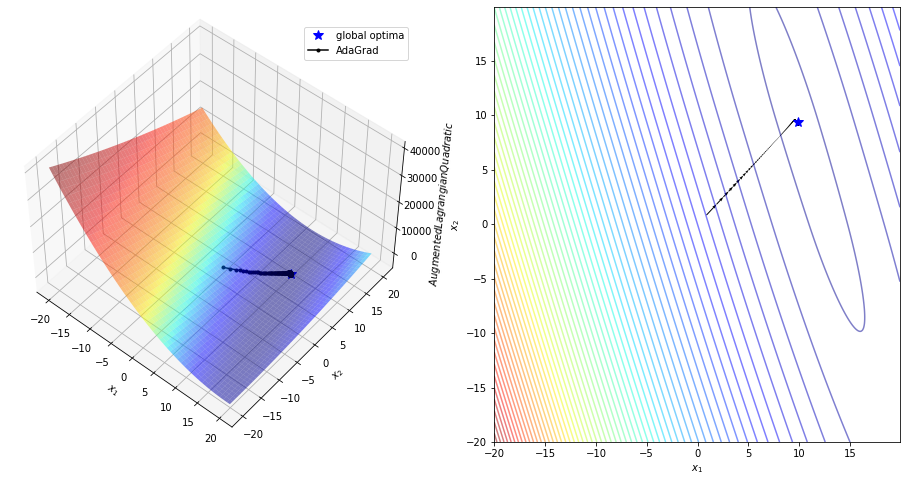

In [16]:
plot_surface_trajectory_optimization(dual, opt, primal=False, x_min=-20, x_max=20, y_min=-20, y_max=20)